# Module 6: Linear Regression Assignment

### These are the typical steps for using a machine learning model:

1. Import the dataset you want to analyze.
2. Identify which features you want to use as predictors (X values) and which feature you want to predict (y value).
3. Split the dataset into training and testing sets.
4. Choose an appropriate machine learning algorithm for your task.
5. Initialize the model by setting its hyperparameters.
6. Train the model on the training set.
7. Visualize the model (if applicable).
8. Test the model on the testing set and evaluate its performance.
9. Use the trained model to make predictions on new data.

## Demo Code: Linear Regression

### Import required Python Libraries for Lab

In [7]:
import pandas as pd
import numpy as np
import os, ssl 
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Load the data

The following dataset contains information on California Housing Prices. California Housing Prices dataset contains information on housing prices in various regions of California, along with a set of features that describe each region. The dataset has a total of 20,640 instances, each with 8 features and a corresponding target value.



The features in the dataset are as follows:

1. MedInc: median income of the households in the region.
2. HouseAge: median age of the houses in the region.
3. AveRooms: average number of rooms per house in the region.
4. AveBedrms: average number of bedrooms per house in the region.
5. Population: total number of people living in the region.
6. AveOccup: average number of people per household in the region.
7. Latitude: latitude of the region's location.
8. Longitude: longitude of the region's location.

The target variable in the dataset is the median house value in units of $100,000 for each region. This is the value that we want to predict using the features in the dataset. The target values range from 0.15 to 5.00, indicating that the dataset includes regions with a wide range of housing prices.

It's worth noting that the California Housing Prices dataset is often used as a benchmark for regression models, as it contains a diverse set of features and a relatively large number of instances. However, it's important to keep in mind that the dataset has its own limitations and potential biases, and it's important to evaluate any models trained on this dataset in the context of your research question and goals.


### Load the California Housing Prices dataset 

In this code, we first use the fetch_california_housing() function from scikit-learn to load the California housing dataset as a pandas DataFrame (california.frame).

In [13]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing(as_frame=True)
california_df = california.frame
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
# Print the target variable
print(california.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [21]:
# Concatenate the features and target into a single DataFrame
california_all_df = pd.concat([california_df, pd.Series(california.target, name='target')], axis=1)


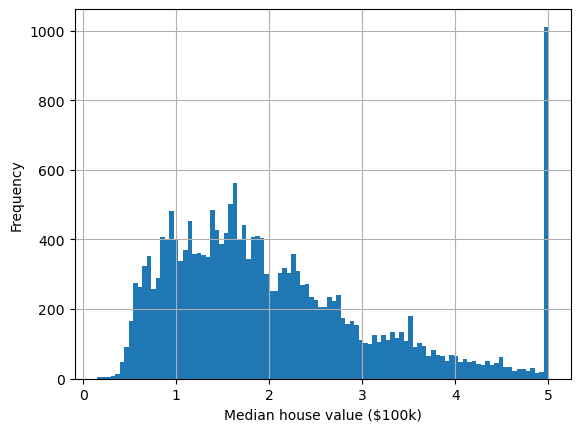

In [23]:
# Perform exploratory data analysis
# Histogram of target variable
california_all_df['target'].hist(bins=100)
plt.xlabel('Median house value ($100k)')
plt.ylabel('Frequency')
plt.show()

### Calculate correlation 

We then concatenate the features and target variable into a single DataFrame (california_all_df) using the pd.concat() method. Note that we also use pd.Series() to convert the target variable from a numpy array to a pandas series and give it the name "target".

Next, we calculate the correlation matrix between the features and the target variable using the .corr() method, and select only the correlations with the "target" column using the ['target'] syntax. Finally, we print the correlation coefficients for each feature.

In [26]:
# Concatenate the features and target into a single DataFrame
#california_all_df = pd.concat([california_df, pd.Series(california.target, name='target')], axis=1)

# Calculate the correlation matrix with the target variable
corr_matrix = california_all_df.corr()['target']

# Print the correlation coefficients
print(corr_matrix)

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
target         1.000000
Name: target, dtype: float64


In [28]:
# Preprocess the data
# Remove outliers
california_df = california_all_df[(california_all_df['AveRooms'] < 20) &
                              (california_all_df['AveBedrms'] < 5) &
                              (california_all_df['Population'] < 10000) &
                              (california_all_df['target'] < 5)]

### Split data into training and testing data


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(california_df.drop(columns='target'), california_df['target'], test_size=0.2, random_state=42)


In [33]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Import an ML algorithm (Using Sklearn algorithms)
 

In [36]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### Initialize your model

In [39]:
# Fit a linear regression model
model = LinearRegression()

### Fit your model and make a prediction

In [42]:
# fit
model.fit(X_train, y_train)# predict
pred = model.predict(X_test)

In [44]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00
R-squared: 1.00


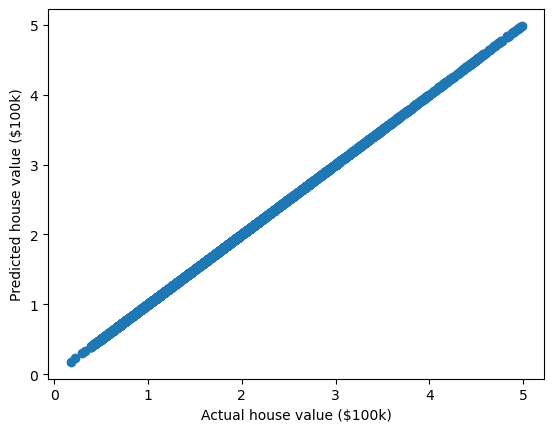

In [46]:
# Visualize predicted vs. actual target values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual house value ($100k)')
plt.ylabel('Predicted house value ($100k)')
plt.show()

## Module 6: Your Turn Linear Regression

This dataset contains data from diabetic patients and features such as their BMI, age , blood pressure and glucose levels that are useful in predicting the diabetes disease progression in patients. We will be looking at these variables that will be used to help predict disease progression in diabetic patients.

### Load the Diabetes dataset from sklearn

The below code will load the data. Turn this into a date frame.
```python
diabetes = datasets.load_diabetes()
```
Add a column called `TARGET` with the target data (`diabetes.target`).  In this case, the target is a measure for disease progression.

In [48]:
diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['TARGET'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Select features 

Select features to use will be used as the predictors (the X values), and which feature you want to predict (the y values)

Use the `"age"` `"bmi"` and `"bp"` features and the `Target` as our target variable.

We are building a predictor of disease progression.


In [52]:
# Print age bmi an dbp Column here
predictor_features = ['age', 'bmi', 'bp']
X = df[predictor_features]
y = df['TARGET']
print(df[predictor_features].head())

        age       bmi        bp
0  0.038076  0.061696  0.021872
1 -0.001882 -0.051474 -0.026328
2  0.085299  0.044451 -0.005670
3 -0.089063 -0.011595 -0.036656
4  0.005383 -0.036385  0.021872


### Visualization 

This code is creating a scatter plot for each feature ('age', 'bmi', 'bp') against a target variable stored in a pandas DataFrame df.

The first line of code sets the size of the figure to 20 units in width and 5 units in height using the figsize parameter of the figure() method of the matplotlib.pyplot module.

The for loop iterates over each feature in the list features and creates a subplot for each one using the subplot() method of pyplot. The subplot is added to a 1x3 grid of subplots (1 row and len(features) columns) and is given an index of i+1, where i is the current index of the feature in the features list.

The x variable is set to the values of the current feature (col) in the DataFrame df, and the y variable is set to the values of the target variable in df.

Then, a scatter plot is created using the scatter() method of pyplot with x and y as its arguments. The marker style for the points is set to 'o' using the marker parameter. A title is added to each subplot with the name of the current feature using the title() method, and the x-axis and y-axis are labeled with the current feature name and 'target', respectively, using the xlabel() and ylabel() methods.

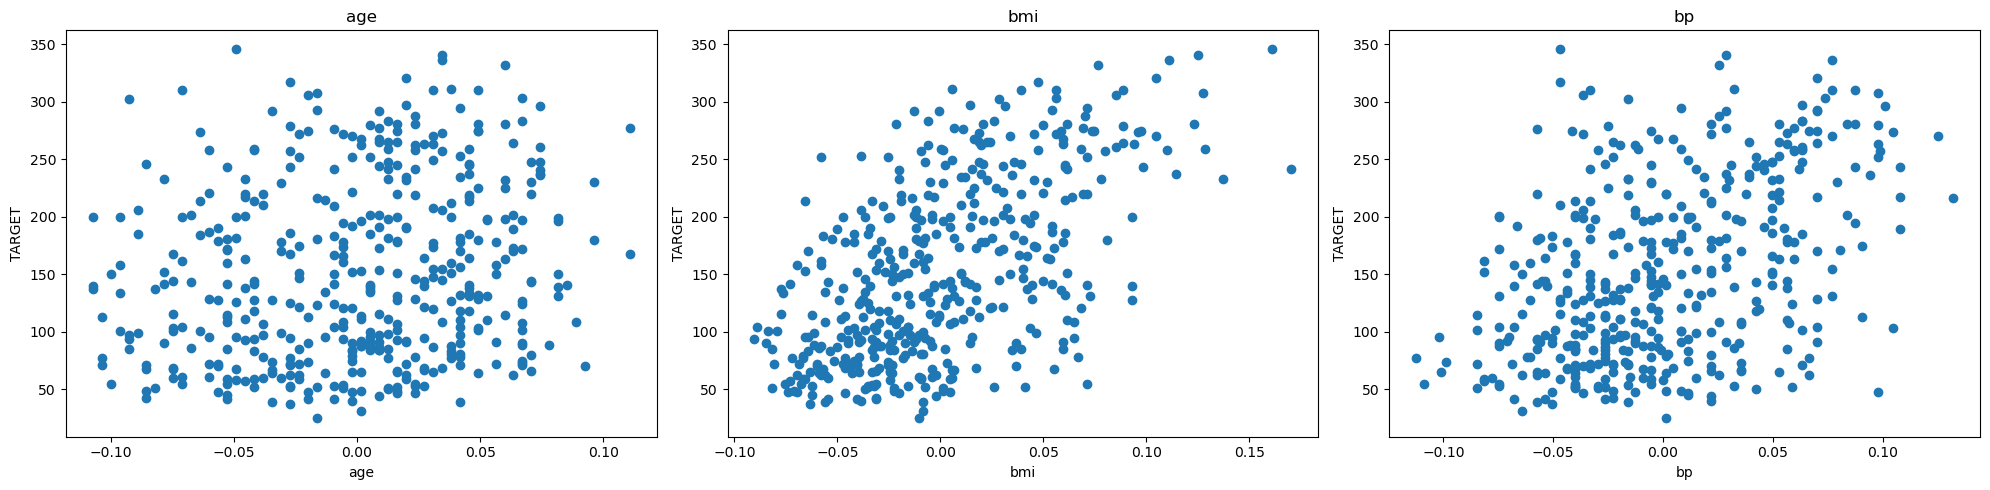

In [54]:
plt.figure(figsize=(20, 5))
features = ['age', 'bmi', 'bp']
target = df['TARGET']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('TARGET')
plt.tight_layout()
plt.show()

### Split the data into train and test data

Use `age`, `bmi`, and `bp` for our independent variables.

In [56]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["age", "bmi", "bp"]], df[["TARGET"]], test_size=0.2, random_state=42)

### Import your model


In [58]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### Initialize your model

In [60]:
# initialize
reg = linear_model.LinearRegression()

### Fit your model and make a prediction
The first line of code is used to train the linear regression model. X_train is a matrix containing the independent variables (also known as features) of the training data, while y_train is a vector containing the dependent variable (also known as target) of the training data. The fit() method is used to fit the linear regression model to the training data.

The second line of code is used to predict the target values for the test data. X_test is a matrix containing the independent variables of the test data. The predict() method is used to predict the target values for the test data based on the trained linear regression model.

Overall, these two lines of code are used to train a linear regression model using the training data and then use the trained model to predict the target values for the test data.

In [62]:
# fit
reg.fit(X_train, y_train)

# predict
pred = reg.predict(X_test)

### Visualize Data and Linear Regeression

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

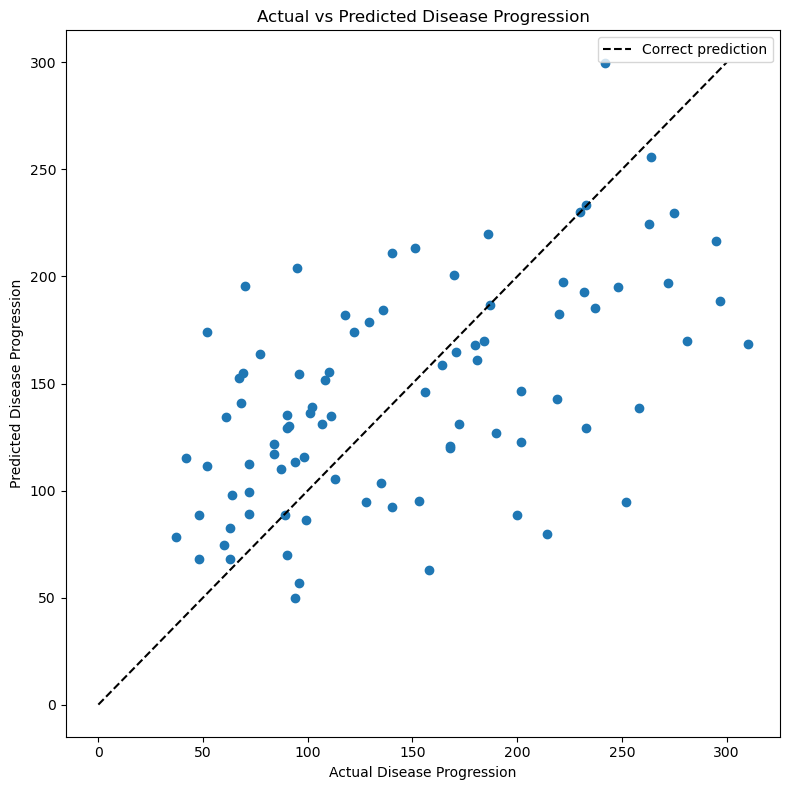

In [64]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title("Actual vs Predicted Disease Progression")
plt.legend()
plt.tight_layout()
plt.show()

### Use the following code to test the accuracy of your model

In [66]:
# predict target values for the test data
pred = reg.predict(X_test)

# evaluate the performance of the model
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("MSE: {:.3f}, MAE: {:.3f}, R-squared: {:.3f}".format(mse, mae, r2))


MSE: 3756.837, MAE: 50.019, R-squared: 0.291


### Use the model

Using the model you created, predict the disease progression of two new patients.

Patient 1:  0.0045 `age` 0.053 `bmi` 0.014 `bp`

Patient 2:  0.0039 `age` -0.012 `bmi` 0.018 `bp`

Note, you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["age", "bmi", "bp"])
```

In [72]:
new_patient_data = pd.DataFrame([[0.0045,0.053,0.014],[0.0039,-0.012,0.018]], columns =["age", "bmi", "bp"])
new_pat_prediction = reg.predict(new_patient_data)

print('prediction: ', new_pat_prediction)                                                                           

prediction:  [[201.62182627]
 [148.76627874]]
